# Importing and Preparing Data


## Importing modules


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Dataset


In [2]:
df = pd.read_csv('dataset/CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [4]:
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [5]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


## Transforming Data


In [6]:
print('Printing the unique values in the categorical columns:')
print('-'*54)
for col in df.select_dtypes('object').columns:
    print(f'{col}: {df[col].unique()}')

Printing the unique values in the categorical columns:
------------------------------------------------------
General_Health: ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise: ['No' 'Yes']
Heart_Disease: ['No' 'Yes']
Skin_Cancer: ['No' 'Yes']
Other_Cancer: ['No' 'Yes']
Depression: ['No' 'Yes']
Diabetes: ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis: ['Yes' 'No']
Sex: ['Female' 'Male']
Age_Category: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
Smoking_History: ['Yes' 'No']


In [7]:
binary_valued_columns = [
    col
    for col in df.select_dtypes('object').columns
    if len(df[col].unique()) == 2
]

print('Printing the categorical columns which are binary valued:')
print('-'*57)
for col in binary_valued_columns:
    print(f'{col}: {df[col].unique()}')

Printing the categorical columns which are binary valued:
---------------------------------------------------------
Exercise: ['No' 'Yes']
Heart_Disease: ['No' 'Yes']
Skin_Cancer: ['No' 'Yes']
Other_Cancer: ['No' 'Yes']
Depression: ['No' 'Yes']
Arthritis: ['Yes' 'No']
Sex: ['Female' 'Male']
Smoking_History: ['Yes' 'No']


In [8]:
print('Factorizing binary valued columns:')
print('-'*34)
for col in binary_valued_columns:
    df[col] = pd.factorize(df[col])[0]
    print(f'{col}: {df[col].unique()}')

Factorizing binary valued columns:
----------------------------------
Exercise: [0 1]
Heart_Disease: [0 1]
Skin_Cancer: [0 1]
Other_Cancer: [0 1]
Depression: [0 1]
Arthritis: [0 1]
Sex: [0 1]
Smoking_History: [0 1]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  int64  
 9   Sex                           308854 non-null  int64  
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [10]:
print('Printing the unique values in the remaning categorical columns:')
print('-'*63)
for col in df.select_dtypes('object').columns:
    print(f'{col}: {df[col].unique()}')

Printing the unique values in the remaning categorical columns:
---------------------------------------------------------------
General_Health: ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Diabetes: ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Age_Category: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']


In [11]:
print('Custom factorized "General_Health" values:')
print('-'*42)

# Uncomment the below in case of any warning for usage of deprecated method.
pd.set_option('future.no_silent_downcasting', True)

df["General_Health"] = df["General_Health"].replace(
    ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'],
    [0, 0.75, 0.50, 0.25, 1]
)
df["General_Health"].unique()

Custom factorized "General_Health" values:
------------------------------------------


array([0, 0.25, 0.5, 0.75, 1], dtype=object)

In [12]:
# In case you the dtype is shown as 'object' for the "General_Health" column, you can convert it to float using the below code:
df["General_Health"] = pd.to_numeric(df["General_Health"])
df["General_Health"].unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [13]:
print('Custom factorized "Checkup" values:')
print('-'*34)

# Uncomment the below in case of any warning for usage of deprecated method.
pd.set_option('future.no_silent_downcasting', True)

df["Checkup"] = df["Checkup"].replace(
    ['Never', 'Within the past year', 'Within the past 2 years',
        'Within the past 5 years', '5 or more years ago'],
    [0, 0.75, 0.50,
     0.25, 1]
)
df["Checkup"].unique()

Custom factorized "Checkup" values:
----------------------------------


array([0.5, 0.75, 1, 0.25, 0], dtype=object)

In [14]:
# In case you the dtype is shown as 'object' for the "Checkup" column, you can convert it to float using the below code:
df["Checkup"] = pd.to_numeric(df["Checkup"])
df["Checkup"].unique()

array([0.5 , 0.75, 1.  , 0.25, 0.  ])

In [15]:
print('Custom factorized "Age_Category" values:')
print('-'*40)

# Uncomment the below in case of any warning for usage of deprecated method.
pd.set_option('future.no_silent_downcasting', True)

df["Age_Category"] = df["Age_Category"].replace([
    '18-24',
    '25-29',
    '30-34',
    '35-39',
    '40-44',
    '45-49',
    '50-54',
    '55-59',
    '60-64',
    '65-69',
    '70-74',
    '75-79',
    '80+'
], [
    0,
    0.08333333333333333,
    0.16666666666666666,
    0.25,
    0.3333333333333333,
    0.41666666666666663,
    0.5,
    0.5833333333333333,
    0.6666666666666666,
    0.75,
    0.8333333333333333,
    0.9166666666666666,
    1
])
df["Age_Category"].unique()

Custom factorized "Age_Category" values:
----------------------------------------


array([0.8333333333333333, 0.6666666666666666, 0.9166666666666666, 1,
       0.75, 0.5, 0.41666666666666663, 0, 0.16666666666666666,
       0.5833333333333333, 0.25, 0.3333333333333333, 0.08333333333333333],
      dtype=object)

In [16]:
# In case you the dtype is shown as 'object' for the "Age_Category" column, you can convert it to float using the below code:
df["Age_Category"] = pd.to_numeric(df["Age_Category"])
df["Age_Category"].unique()

array([0.83333333, 0.66666667, 0.91666667, 1.        , 0.75      ,
       0.5       , 0.41666667, 0.        , 0.16666667, 0.58333333,
       0.25      , 0.33333333, 0.08333333])

In [17]:
# Since there are is an additional argument attached to the 'Yes' or 'No', we can just factorize as 0/1 like binary valued columns.
# Nor can we cutomize factorize into such as "General_Health", "Checkup" and "Age_Category". So, we'll have to factorize them in sepreated values.
df["Diabetes"] = pd.factorize(df["Diabetes"])[0]
df["Diabetes"].unique()

array([0, 1, 2, 3])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  float64
 1   Checkup                       308854 non-null  float64
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int64  
 8   Arthritis                     308854 non-null  int64  
 9   Sex                           308854 non-null  int64  
 10  Age_Category                  308854 non-null  float64
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

## Analyzing the data


In [19]:
df.describe()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,0.511867,0.699088,0.775062,0.080850,0.097114,0.096738,0.200422,0.200422,0.672755,0.481321,0.544657,170.615249,83.588655,28.626211,0.594423,5.096366,29.835200,15.110441,6.296616
std,0.289671,0.155998,0.417542,0.272606,0.296113,0.295602,0.400316,0.506273,0.469208,0.499652,0.293627,10.658026,21.343210,6.522323,0.491004,8.199763,24.875735,14.926238,8.582954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,163.000000,68.040000,24.210000,0.000000,0.000000,12.000000,4.000000,2.000000
50%,0.500000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.583333,170.000000,81.650000,27.440000,1.000000,1.000000,30.000000,12.000000,4.000000
75%,0.750000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.750000,178.000000,95.250000,31.850000,1.000000,6.000000,30.000000,20.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,241.000000,293.020000,99.330000,1.000000,30.000000,120.000000,128.000000,128.000000


In [20]:
df.corr()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,1.000000,-0.018515,0.037965,-0.042974,-0.031432,-0.043591,-0.053123,-0.034714,0.075979,0.015600,-0.069634,0.012955,-0.054230,-0.066936,0.045035,0.006931,0.033199,0.047095,-0.006641
Checkup,-0.018515,1.000000,-0.029600,0.054176,0.045633,0.051301,0.006908,0.058347,-0.087206,-0.026153,0.157092,-0.027312,0.020623,0.037386,-0.028888,-0.020440,0.010330,0.011096,-0.016136
Exercise,0.037965,-0.029600,1.000000,-0.096347,-0.003986,-0.054388,-0.084729,-0.107540,0.124813,0.059344,-0.122345,0.091618,-0.090144,-0.155756,0.093295,0.094959,0.136787,0.125002,-0.036930
Heart_Disease,-0.042974,0.054176,-0.096347,1.000000,0.090848,0.092387,0.032526,0.123101,-0.153913,0.072595,0.229011,0.015780,0.045875,0.042666,-0.107797,-0.036569,-0.020055,-0.024043,-0.009227
Skin_Cancer,-0.031432,0.045633,-0.003986,0.090848,1.000000,0.150824,-0.013014,0.023726,-0.136178,0.009678,0.272074,0.006812,-0.028954,-0.037619,-0.032828,0.042764,0.024123,0.012871,-0.038919
Other_Cancer,-0.043591,0.051301,-0.054388,0.092387,0.150824,1.000000,0.015892,0.047593,-0.129362,-0.042044,0.234459,-0.043459,-0.021132,0.001047,-0.053431,-0.008663,0.007974,-0.003237,-0.033298
Depression,-0.053123,0.006908,-0.084729,0.032526,-0.013014,0.015892,1.000000,0.051821,-0.121598,-0.141450,-0.103169,-0.091318,0.047936,0.109597,-0.100275,-0.028135,-0.039943,-0.051170,0.018138
Diabetes,-0.034714,0.058347,-0.107540,0.123101,0.023726,0.047593,0.051821,1.000000,-0.110147,-0.035894,0.150374,-0.058875,0.126805,0.178524,-0.042050,-0.094908,-0.016323,-0.019655,-0.006348
Arthritis,0.075979,-0.087206,0.124813,-0.153913,-0.136178,-0.129362,-0.121598,-0.110147,1.000000,0.100053,-0.370997,0.097789,-0.074104,-0.137964,0.123196,0.024896,0.002012,0.018825,0.050961
Sex,0.015600,-0.026153,0.059344,0.072595,0.009678,-0.042044,-0.141450,-0.035894,0.100053,1.000000,-0.060232,0.698167,0.354019,0.010989,-0.073402,0.129291,-0.092462,-0.069179,0.130052


<Axes: >

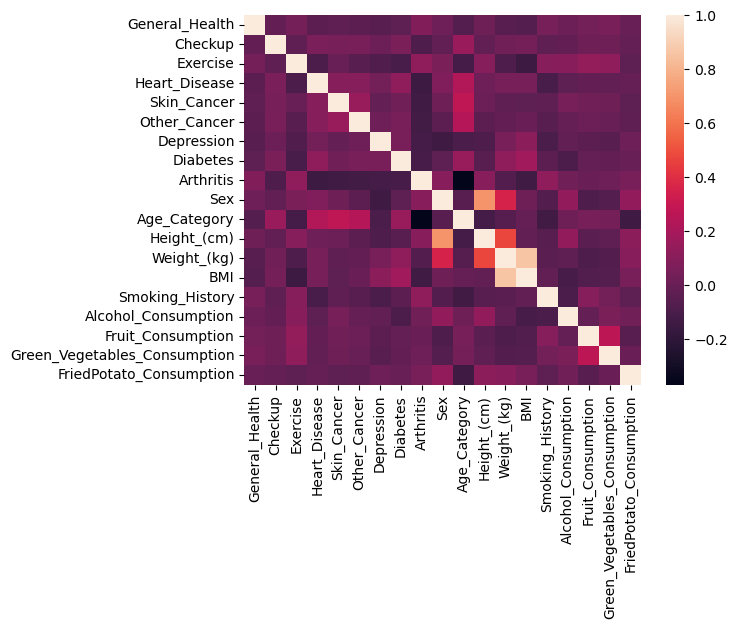

In [21]:
sns.heatmap(df.corr())

# Prediction Model Development


## Extracting the target value


In [22]:
target_name = 'Heart_Disease'
data_target = df[target_name]
df.drop([target_name], axis=1, inplace=True)
df.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.00,0.50,0,0,0,0,0,0,0,0.833333,150.0,32.66,14.54,0,0.0,30.0,16.0,12.0
1,0.25,0.75,0,0,0,0,1,1,0,0.833333,165.0,77.11,28.29,1,0.0,30.0,0.0,4.0
2,0.25,0.75,1,0,0,0,1,1,0,0.666667,163.0,88.45,33.47,1,4.0,12.0,3.0,16.0
3,0.00,0.75,1,0,0,0,1,1,1,0.916667,180.0,93.44,28.73,1,0.0,30.0,30.0,8.0
4,0.50,0.75,0,0,0,0,0,1,1,1.000000,191.0,88.45,24.37,0,0.0,8.0,4.0,0.0


# Spliting the Dataset


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train, test, target, target_test = train_test_split(
    df, data_target, test_size=0.25, random_state=10)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231640 entries, 27453 to 236669
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                231640 non-null  float64
 1   Checkup                       231640 non-null  float64
 2   Exercise                      231640 non-null  int64  
 3   Skin_Cancer                   231640 non-null  int64  
 4   Other_Cancer                  231640 non-null  int64  
 5   Depression                    231640 non-null  int64  
 6   Diabetes                      231640 non-null  int64  
 7   Arthritis                     231640 non-null  int64  
 8   Sex                           231640 non-null  int64  
 9   Age_Category                  231640 non-null  float64
 10  Height_(cm)                   231640 non-null  float64
 11  Weight_(kg)                   231640 non-null  float64
 12  BMI                           231640 non-null

In [26]:
train.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
27453,0.25,0.75,1,0,0,0,0,1,1,0.583333,173.0,81.65,27.37,0,24.0,8.0,8.0,12.0
147110,0.25,0.75,1,0,0,1,0,1,0,0.333333,165.0,104.33,38.27,0,25.0,4.0,12.0,2.0
40093,1.00,0.50,1,0,0,0,0,1,1,0.500000,191.0,108.86,30.00,1,0.0,28.0,28.0,3.0
221433,0.25,0.75,1,0,0,0,0,0,0,0.916667,165.0,78.02,28.62,0,10.0,30.0,2.0,3.0
94593,0.25,0.75,1,1,0,0,0,0,0,0.916667,165.0,79.83,29.29,0,0.0,10.0,0.0,2.0


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77214 entries, 41199 to 220695
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                77214 non-null  float64
 1   Checkup                       77214 non-null  float64
 2   Exercise                      77214 non-null  int64  
 3   Skin_Cancer                   77214 non-null  int64  
 4   Other_Cancer                  77214 non-null  int64  
 5   Depression                    77214 non-null  int64  
 6   Diabetes                      77214 non-null  int64  
 7   Arthritis                     77214 non-null  int64  
 8   Sex                           77214 non-null  int64  
 9   Age_Category                  77214 non-null  float64
 10  Height_(cm)                   77214 non-null  float64
 11  Weight_(kg)                   77214 non-null  float64
 12  BMI                           77214 non-null  float64
 13  S

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77214 entries, 41199 to 220695
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                77214 non-null  float64
 1   Checkup                       77214 non-null  float64
 2   Exercise                      77214 non-null  int64  
 3   Skin_Cancer                   77214 non-null  int64  
 4   Other_Cancer                  77214 non-null  int64  
 5   Depression                    77214 non-null  int64  
 6   Diabetes                      77214 non-null  int64  
 7   Arthritis                     77214 non-null  int64  
 8   Sex                           77214 non-null  int64  
 9   Age_Category                  77214 non-null  float64
 10  Height_(cm)                   77214 non-null  float64
 11  Weight_(kg)                   77214 non-null  float64
 12  BMI                           77214 non-null  float64
 13  S

In [29]:
test.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
41199,0.75,0.75,1,0,0,1,0,1,0,0.166667,178.0,79.38,25.11,1,3.0,16.0,2.0,2.0
66315,0.25,0.75,0,0,0,0,0,1,1,0.583333,183.0,86.18,25.77,1,20.0,60.0,12.0,24.0
160747,0.50,0.75,1,0,0,1,0,1,0,0.166667,170.0,108.86,37.59,1,2.0,8.0,8.0,4.0
25481,0.50,0.25,1,0,0,1,0,1,0,0.000000,152.0,88.45,38.08,1,5.0,30.0,5.0,6.0
16001,0.50,0.75,1,0,0,1,0,0,0,0.750000,157.0,71.67,28.90,0,0.0,30.0,12.0,2.0


In [30]:
# %% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(
    train, target, test_size=0.2, random_state=0)

In [31]:
# Creating an empty dataframe for storing the results of the models
collect_benchmark = []
benchmark_cols = ['Model', 'Training_Accuracy', 'Testing_Accuracy']

## Logistic Regression


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logreg = LogisticRegression()
logreg.fit(train, target)
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

/home/shamith/miniconda3/envs/cardiovascular-risk-prediction/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


91.86

In [34]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

91.83

In [35]:
collect_benchmark.append(['Logistic Regression', acc_log, acc_test_log])
pd.DataFrame(collect_benchmark, columns=benchmark_cols)

,Model,Training_Accuracy,Testing_Accuracy
0,Logistic Regression,91.86,91.83


In [36]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
9,Height_(cm),1.804881
8,Age_Category,1.040374
3,Other_Cancer,0.527871
4,Depression,0.498679
1,Exercise,0.214648
6,Arthritis,0.208759
5,Diabetes,0.128298
11,BMI,0.005849
15,Green_Vegetables_Consumption,-0.000250
16,FriedPotato_Consumption,-0.000504


## Decision Tree


In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
acc_decision_tree = round(decision_tree.score(train, target) * 100, 2)
acc_decision_tree

100.0

In [39]:
acc_test_decision_tree = round(decision_tree.score(test, target_test) * 100, 2)
acc_test_decision_tree

85.98

In [40]:
collect_benchmark.append(
    ['Decision Tree', acc_decision_tree, acc_test_decision_tree])
pd.DataFrame(collect_benchmark, columns=benchmark_cols)

,Model,Training_Accuracy,Testing_Accuracy
0,Logistic Regression,91.86,91.83
1,Decision Tree,100.00,85.98


## Random Forest Classification


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [42]:
random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={
                             'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest, random_forest.best_params_)

100.0 {'n_estimators': 300}


In [43]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

91.86

In [44]:
collect_benchmark.append(
    ['Random Forest Classification', acc_random_forest, acc_test_random_forest])
pd.DataFrame(collect_benchmark, columns=benchmark_cols)

,Model,Training_Accuracy,Testing_Accuracy
0,Logistic Regression,91.86,91.83
1,Decision Tree,100.00,85.98
2,Random Forest Classification,100.00,91.86


# Conclusion


<Axes: xlabel='Model'>

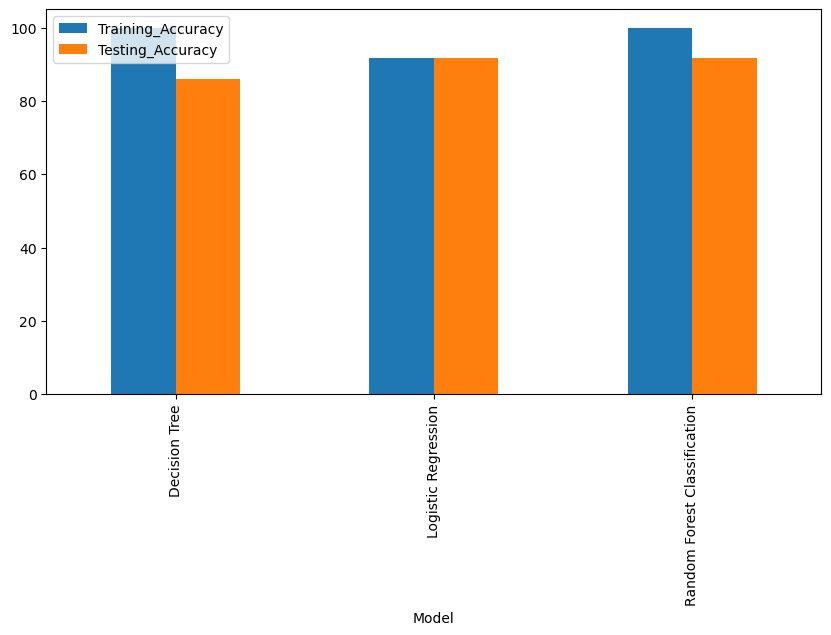

In [45]:
results = pd.DataFrame(collect_benchmark, columns=benchmark_cols)
results.groupby('Model').sum().plot(kind='bar', figsize=(10, 5))

In conclusion, Random Forest Classification does a better job in predicting whether the patient has a 10-year risk of future coronary heart disease (CHD). Even though Decision Tree Classification and Logistic Regression did preform well in predicting the possible outcome, they could exceed the accuary of the model trained using Random Forest Classification algorithm.